# AE 102 PROJECT - DREAM TEAM

In [93]:
import pandas as pd
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
from numpy.random import *
import scipy.stats as stats
from ipywidgets import *

By importing panda and using read csv function, we included the csv file as a panda's data frame. Then we printed that data frame, then for every individual panda series, we stored them as numpy array with different name. We made graphs and then seaborn curve joint plot is plotted. Now we plotted number of runs scored by batsman vs number of balls faced by him which naturally approximates to a stright line.

In [2]:
batsmen_data = pd.read_csv("Dream_Team_csv_batsmen.csv", index_col = "Batsman").dropna()
bowler_data = pd.read_csv("Dream_Team_csv_bowlers.csv", index_col = "Bowler").dropna()

In [3]:
print (batsmen_data)

               Total runs scored  Total balls faced  Strike rate
Batsman                                                         
V Kohli                   6479.0             5124.0     1.264442
S Dhawan                  6091.0             4945.0     1.231749
RG Sharma                 5768.0             4529.0     1.273570
DA Warner                 5715.0             4187.0     1.364939
SK Raina                  5536.0             4177.0     1.325353
...                          ...                ...          ...
SO Hetmyer                 777.0              530.0     1.466038
ST Jayasuriya              768.0              573.0     1.340314
MM Ali                     753.0              540.0     1.394444
GC Smith                   739.0              691.0     1.069465
V Shankar                  731.0              616.0     1.186688

[100 rows x 3 columns]


In [4]:
print (bowler_data)

                   Runs conceded  Extras  Total balls bowled  \
Bowler                                                         
SL Malinga                  3194     292                2974   
DJ Bravo                    4140     255                3266   
SP Narine                   3654     150                3419   
R Ashwin                    4178     198                3852   
A Mishra                    3897     125                3317   
...                          ...     ...                 ...   
Arshdeep Singh               854      73                 678   
Washington Sundar            995      26                 868   
R Tewatia                   1063      28                 846   
MS Gony                     1250      67                 925   
KK Cooper                    725      64                 600   

                   Total runs conceded  Economy  Wickets taken  Value assigned  
Bowler                                                                          
SL Ma

## Description of the data

In [5]:
batsmen_runs = pd.Series(batsmen_data["Total runs scored"]).to_numpy()
batsmen_balls = pd.Series(batsmen_data["Total balls faced"]).to_numpy()
bowler_economy = pd.Series(bowler_data["Economy"]).to_numpy()
bowler_wickets = pd.Series(bowler_data["Wickets taken"]).to_numpy()
batsmen_sr = pd.Series(batsmen_data["Strike rate"]).to_numpy()

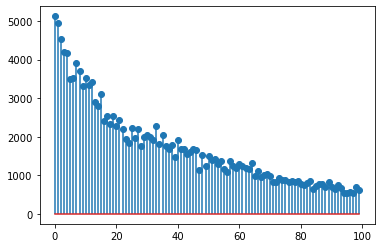

In [6]:
stem(batsmen_balls);

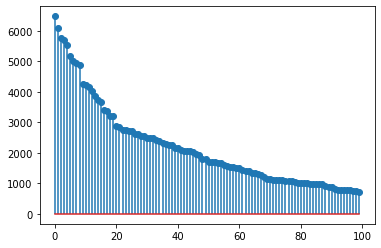

In [7]:
stem(batsmen_runs);

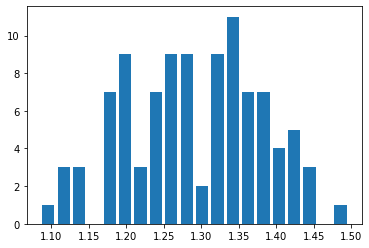

In [8]:
hist(bowler_economy, bins=20, rwidth=0.8);


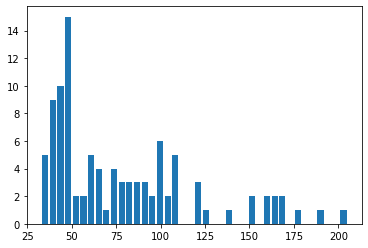

In [9]:
hist (bowler_wickets, bins=40, rwidth = 0.8);

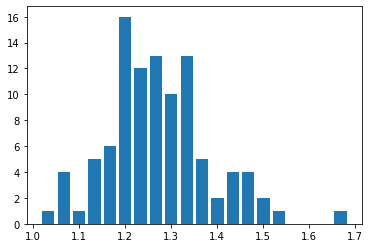

In [10]:
hist(batsmen_sr, bins=20, rwidth = 0.8);

In [11]:
import seaborn as sb

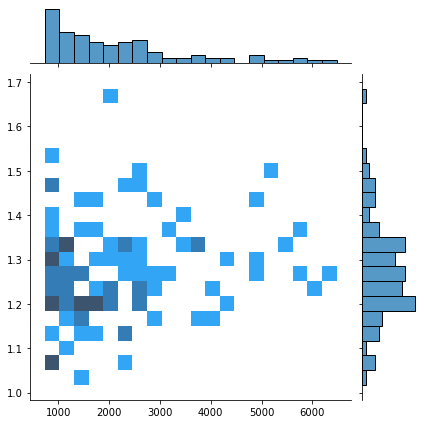

In [12]:
sb.jointplot(x=batsmen_runs, y=batsmen_sr,kind="hist", bins = 20, marginal_kws = dict(bins=20));

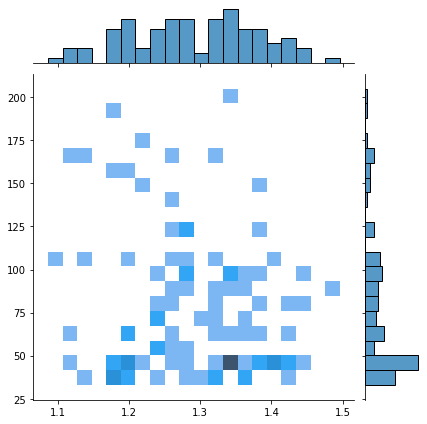

In [62]:
sb.jointplot(x=bowler_economy, y=bowler_wickets,kind="hist", bins = 20, marginal_kws = dict(bins=20));

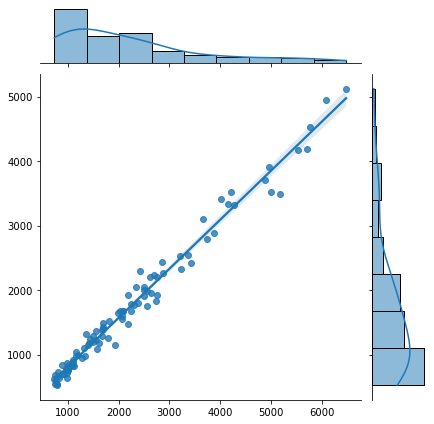

In [14]:
sb. jointplot(x = batsmen_runs, y=batsmen_balls, kind = "reg");

We can clearly see that for no. of runs scored vs number of balls faced, the line is a good approximation. This is fairly obvious since the more the number of balls a batsman faces, the more the likeliness that he will score more runs. We can also conclude from this that a batsmen whos points lie below the line are having a lower strike rate and vice versa.

## Sampling Distributions

In [15]:
def gen_means(no_of_samples, sample_size, data_array):
    means=[]
    for i in range(no_of_samples):
        sample = choice(data_array,sample_size)
        means.append(mean(sample))
    return means

We took 1000 samples of size 20 for each of the random variables, for mean of those an approximately gaussian curve is seen and for variance an approximately (chi)^2 distribution curve is seen those graphs are also shown.

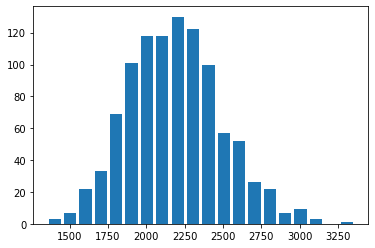

In [16]:
hist(gen_means(1000,20, batsmen_runs), bins = 20, rwidth=0.8);

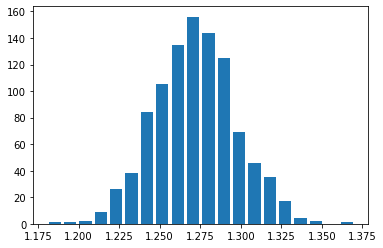

In [17]:
hist(gen_means(1000,20, batsmen_sr), bins = 20, rwidth=0.8);

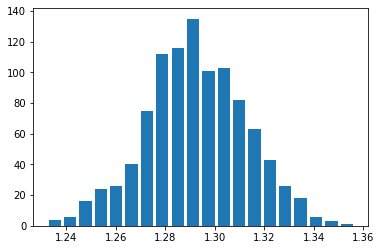

In [18]:
hist(gen_means(1000,20, bowler_economy), bins = 20, rwidth = 0.8);

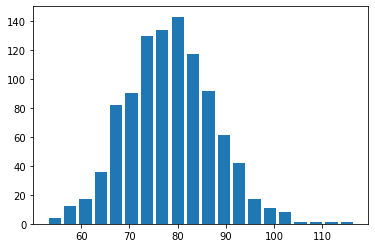

In [19]:
hist(gen_means(1000,20, bowler_wickets), bins = 20, rwidth = 0.8);

They clearly resemble a gaussian distribution

In [20]:
def gen_vars(no_of_samples, sample_size, data_array):
    vars=[]
    for i in range(no_of_samples):
        sample = choice(data_array,sample_size)
        vars.append(var(sample, ddof=1))
    return vars

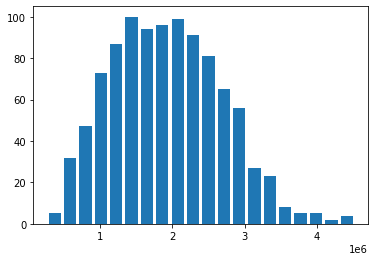

In [21]:
hist(gen_vars(1000,20, batsmen_runs), bins = 20, rwidth=0.8);

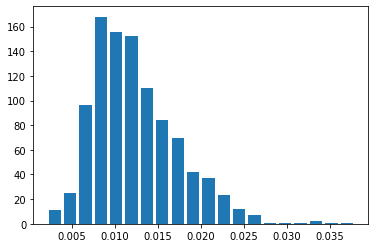

In [22]:
hist(gen_vars(1000,20, batsmen_sr), bins = 20, rwidth=0.8);

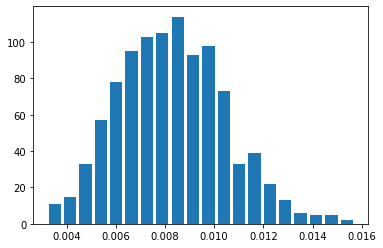

In [23]:
hist(gen_vars(1000,20, bowler_economy), bins = 20, rwidth=0.8);

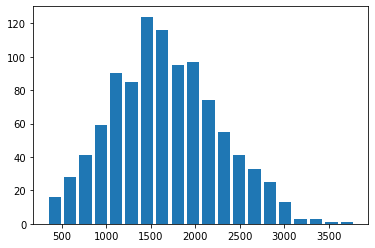

In [24]:
hist(gen_vars(1000,20, bowler_wickets), bins = 20, rwidth=0.8);

They closely resemble a $\chi^2$ distribution

## Point and Interval Estimates

In [25]:
print ("True mean of runs scored by each batsmen = " + str(mean(batsmen_runs)))
print ("True mean of strike rate of each batsmen = " + str(mean(batsmen_sr)))
print ("True mean of economy of each bowler = " + str(mean(bowler_economy)))
print ("True mean of number of wickets taken by each bowler = " + str(mean(bowler_wickets)))

True mean of runs scored by each batsmen = 2193.68
True mean of strike rate of each batsmen = 1.27290877497
True mean of economy of each bowler = 1.2917
True mean of number of wickets taken by each bowler = 78.57


Now, we have compared the true mean and variance to sample mean and variance and then graphs are drawn. We showed that it lies between confidence interval, that adjusting accordingly the sample size and confidence interval it fits and unfits.
in this we have choosen default confidence interval of 95% and sample is 20 and the same thing is done for variance.
now we'll see regression


In [26]:
print ("True variance of runs scored by each batsmen = " + str(var(batsmen_runs)))
print ("True variance of strike rate of each batsmen = " + str(var(batsmen_sr)))
print ("True variance of economy of each bowler = " + str(var(bowler_economy)))
print ("True variance of number of wickets taken by each bowler = " + str(var(bowler_wickets)))

True variance of runs scored by each batsmen = 1909574.4775999996
True variance of strike rate of each batsmen = 0.012389157058262556
True variance of economy of each bowler = 0.00818823
True variance of number of wickets taken by each bowler = 1685.6651000000004


In [27]:
sample_batsmen_runs = choice(pd.Series(batsmen_runs).to_numpy(),20)
sample_batsmen_sr = choice(pd.Series(batsmen_sr).to_numpy(),20)
sample_bowler_economy = choice(pd.Series(bowler_economy).to_numpy(),20)
sample_bowler_wickets = choice(pd.Series(bowler_wickets).to_numpy(),20)

In [28]:
print ("Sample mean of runs scored by each batsmen = " + str(mean(sample_batsmen_runs)))
print ("Sample mean of runs of variance batsmen = " + str(mean(sample_batsmen_sr)))
print ("Sample mean of economy of each bowler = " + str(mean(sample_bowler_economy)))
print ("Sample mean of number of wickets taken by each bowler = " + str(mean(sample_bowler_wickets)))

Sample mean of runs scored by each batsmen = 1653.0
Sample mean of runs of variance batsmen = 1.25685920585
Sample mean of economy of each bowler = 1.26965
Sample mean of number of wickets taken by each bowler = 85.35


In [29]:
print ("Sample variance of runs scored by each batsmen = " + str(var(sample_batsmen_runs)))
print ("Sample variance of strike rate of each batsmen = " + str(var(sample_batsmen_sr)))
print ("Sample variance of economy of each bowler = " + str(var(sample_bowler_economy)))
print ("Sample variance of number of wickets taken by each bowler = " + str(var(sample_bowler_wickets)))

Sample variance of runs scored by each batsmen = 632433.9
Sample variance of strike rate of each batsmen = 0.00874162335288187
Sample variance of economy of each bowler = 0.010306827499999999
Sample variance of number of wickets taken by each bowler = 1470.3274999999999


In [142]:
def compute_CI_mean(dataset, n_samples, interval):
    sample = choice(dataset, n_samples, replace=False)
    sample_mean = mean(sample)
    sample_std = std(sample, ddof=1)
    z = stats.norm.ppf(1 -  (100 - interval)/200)
    ci_lo = sample_mean - z*sample_std/sqrt(n_samples)
    ci_hi = sample_mean + z*sample_std/sqrt(n_samples)
    return ci_lo, ci_hi

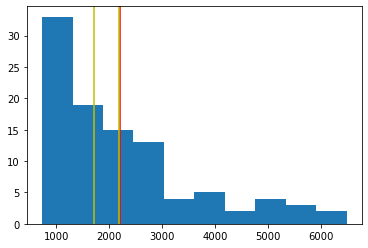

In [143]:
hist(batsmen_runs)
axvline(x = mean(batsmen_runs), color = 'r')
axvline(x = compute_CI_mean(batsmen_runs, 20, 95)[0], color = 'y')
axvline(x = compute_CI_mean(batsmen_runs, 20, 95)[1], color = 'y');

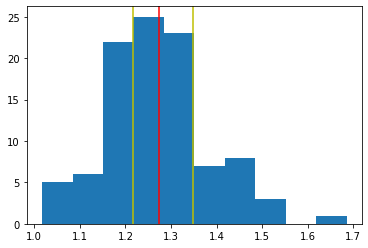

In [146]:
hist(batsmen_sr)
axvline(x = mean(batsmen_sr), color = 'r')
axvline(x = compute_CI_mean(batsmen_sr, 20, 95)[0], color = 'y')
axvline(x = compute_CI_mean(batsmen_sr, 20, 95)[1], color = 'y')

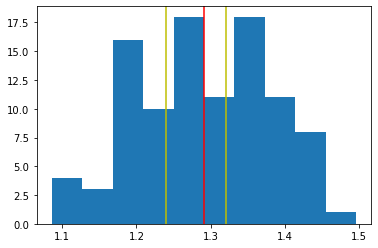

In [150]:
hist(bowler_economy)
axvline(x = mean(bowler_economy), color = 'r')
axvline(x = compute_CI_mean(bowler_economy, 20, 95)[0], color = 'y')
axvline(x = compute_CI_mean(bowler_economy, 20, 95)[1], color = 'y')

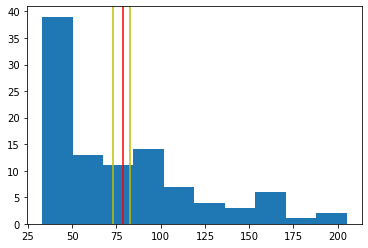

In [149]:
hist(bowler_wickets)
axvline(x = mean(bowler_wickets), color = 'r')
axvline(x = compute_CI_mean(bowler_wickets, 20, 95)[0], color = 'y')
axvline(x = compute_CI_mean(bowler_wickets, 20, 95)[1], color = 'y')

In [151]:
def compute_CI_var(dataset, n_samples, interval):
    sample = choice(dataset, n_samples, replace=False)
    sample_var = var(sample)
    sample_std = std(sample, ddof=1)
    z = stats.norm.ppf(1 - (100 - interval)/200)
    ci_lo = sample_var - z*sample_std/sqrt(n_samples)
    ci_hi = sample_var + z*sample_std/sqrt(n_samples)
    return ci_lo, ci_hi

In [152]:
compute_CI_var(batsmen_runs, 20, 95)

(1448916.742510501, 1449999.4324894988)

In [153]:
compute_CI_var(batsmen_sr, 20, 95)

(-0.039676644625791874, 0.06875062119646037)

In [154]:
compute_CI_var(bowler_economy, 20, 95)

(-0.03231722940315731, 0.048449309403157316)

In [155]:
compute_CI_var(bowler_wickets, 20, 95)

(2654.3925383898463, 2700.9274616101543)

From the histograms of the mean plotted it can be seen that as the confidence interval grows larger, the wider the gap between the two yellow lines. Hence the probability that the true mean lies between them grows larger and hence the confidence increases. Similiarly for variance, we computed the 95% confidence intervals.

## Regression

In [50]:
def compute_lin_reg_coeffs(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sxx = np.sum((x - x_bar)**2)
    sxy = np.sum((x - x_bar)*(y - y_bar))
    b1 = sxy/sxx
    b0 = y_bar - b1*x_bar
    return b0, b1

In [51]:
b0, b1 = compute_lin_reg_coeffs(batsmen_runs, batsmen_sr)

In [52]:
print(b0, b1)

1.2453263856111285 1.257357014645324e-05


Text(0, 0.5, 'Strike Rate')

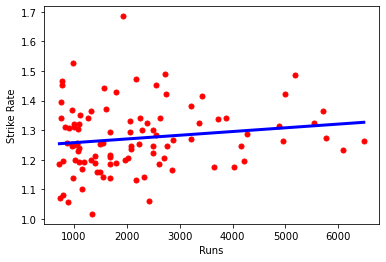

In [56]:
plot(batsmen_runs,batsmen_sr, 'ro', markersize=5)
plot(batsmen_runs, b0 + b1*batsmen_runs, 'b-', lw=3)
xlabel('Runs')
ylabel('Strike Rate')

In [59]:
b0, b1 = compute_lin_reg_coeffs(bowler_economy, bowler_wickets)

In [60]:
print(b0, b1)

165.6404075606083 -67.40760823767774


Text(0, 0.5, 'Wickets')

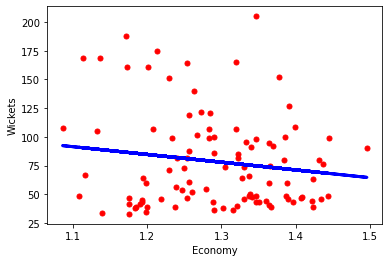

In [61]:
plot(bowler_economy, bowler_wickets, 'ro', markersize=5)
plot(bowler_economy, b0 + b1*bowler_economy, 'b-', lw=3)
xlabel('Economy')
ylabel('Wickets')

In both cases, we do not find a good linear relationship between our random variables. Hence, linear regression may not be such a good approximation.

## Hypothesis testing

**Here we check whether the player played better compared to his previous records...** To compare this one approach could have been directly comparing the current mean with other players. But we used this hypothesis testing approach so as to check whether the current performance was probabilistic or just a "by chance event". <br>
Here, we are trying to compare a new bowler with the rest of the players in ipl. We use the data of the last 14 matches he played and try to find out wether his performance is average or above average. Similiarly for batsmen, we will be doing the same thing in terms of strike rate. (Imagine that we wish to include a power-hitting finisher to provide an ideal end to every batting innings)

In [72]:
bowler_current_stats = array([6.00, 5.55, 8.55, 7.12, 9.78, 6.87, 9.88, 4.59, 8.24, 10.00, 6.78, 8.66, 7.88, 9.24])/6

In [73]:
xbar= mean(bowler_current_stats)  
mu = mean(bowler_economy)

H0: mu = mean <br> 
H1: mu > mean <br>
Chosing the level of significance $\alpha$ as 0.05 

In [78]:
stnd = std(bowler_economy, ddof=1)
Z= (xbar-mu)/(stnd/sqrt(14))
print (Z)

0.10008720545293666


In [97]:
norm_dist = stats.norm
p_value = 1 - norm_dist.cdf(Z)

In [98]:
p_value 

0.46013754644725446

**Decision :** (based on alpha value)<br>
Here, clearly, the p_value obtained is much greater than the value of $\alpha$ and hence we fail to reject the null hypoethesis. Hence, we conclude that the player under anlysis is an average player. He will have to work very hard and improve his numbers a great deal to make it into our team! Or, alternatively, we would need the data of performances of his second to last season or before that to collect enough data to perhaps conclude that he can make it into our team.

In [122]:
batsman_current_stats= array([132,145,123,152,154,136,123,143,100,120,198,140,140,130])/100

In [123]:
mu= mean(batsmen_sr)  
xbar = mean(batsman_current_stats)

H0: mu = mean <br>
H1: mu > mean <br>
Level of significance $\alpha$ = 0.05

In [124]:
stnd = std(batsmen_sr,ddof=1)
Z= (xbar-mu)/(stnd/sqrt(14))

norm_dist = stats.norm
p_value = 1 - norm_dist.cdf(Z)
print(p_value)

**Decision :** (based on alpha value)
From this we can conclude that the p_value is lesser than the level of significance (0.05). Hence, we have enough evidence to safely conclude that the player under analysis has a very high and healthy strike rate. We will definitely place a bid on our friend here and try to include him in our team!

Another idea of hypothesis testing would be to compare the recent performances of a player to their past performances and check whether they have improved over thhe course of their career or not. However, due to lack of data, we are not able to do so.

## Contributions - 

Presentation - Astha Dable , Anshul Aggarwal <br>
Data Collection - Akash Banger, Anshul Aggarwal<br>
Data description - Akash Banger, Anshul Aggarwal, Abhishek Choudhary<br>
Sampling distributions - Anshul Aggarwal, Abhishek Choudhary<br>
Point and Interval estimates - Anshul Aggarwal, Astha Dable<br>
Regression - Anshul Aggarwal<br>
Hypothesis Testing - Anshul Aggarwal, Abhishek Choudhary<br>